In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from denn import *
import pandas as pd
import io #Used as buffer

# Read Data

In [2]:
path= Path(f'../../data/cluster_results')

In [3]:
def read_csv(f):
    df = pd.read_csv(f).mean()
    df['std'] = pd.read_csv(f).std().iloc[0] ##added line for std, remove this will remove std from table
    df['experiment'] = f.parent.parent.parent.name
    df['function'] = f.parent.parent.name
    name = f.parent.name
    #print(name)
    df['freq'] = float(name[4:].split('n')[0])
    #print(df['freq'])
    df['method'] = f.name.split('_')[0]+'_'+f.name.split('_')[1]
    #df['method'] = f.name.split('_')[0]
    #print(df['method'])
    return df

measure_name=['mof','sr','arr','nfe','nn_time']
index_measure=0

In [4]:
m = measure_name[index_measure]
files  = list(f for f in path.glob(f'exp*/*/freq*nn_p3nn_s3nn_tw5*bs4*/*{m}.csv') if 'NNnorm' in f.name)
# files += list(path.glob(f'exp*/*/*nn_p3/*{m}.csv'))
files += [f for f in path.glob(f'exp*/*/freq*nn_p3nn_s2nn_tw5*bs4*/*{m}.csv') if 'noNN' in f.name] #f'exp*/*/*nn_p3/*{m}.csv'  , 
#print(files)
df = pd.DataFrame([read_csv(f) for f in files])
# data = pd.pivot_table(df, index=['experiment','function'], columns='method', values=m) #,'freq' later for adding frequency experiment
data = pd.pivot_table(df, index=['experiment','function','freq'],  columns='method') #,'freq' later for adding frequency experiment, ,values=m
data.style.format("{:,.2f}")

In [5]:
#to add std to table
final_data = data[m].copy()

for col in data[m].columns:
    final_data[col] = data[m][col].apply(lambda x: f'{x:,.2f} (±') + data['std'][col].apply(lambda x: f'{x:,.2f})')
final_data

method                                      NNnorm_Random  \
experiment function   freq                                  
exp1       rastrigin  0.5                   18.08 (±6.33)   
                      1.0                   14.72 (±5.03)   
                      4.0                   11.84 (±5.40)   
           rosenbrock 0.5        213,928.82 (±276,531.90)   
                      1.0         85,888.45 (±100,035.47)   
                      4.0          40,017.67 (±47,131.12)   
           sphere     0.5                   13.19 (±9.44)   
                      1.0                    7.92 (±8.36)   
                      4.0                    4.54 (±3.41)   
exp2       rastrigin  0.5                    3.41 (±0.37)   
                      1.0                    2.04 (±0.22)   
                      4.0                    1.08 (±0.11)   
           rosenbrock 0.5                 112.11 (±13.73)   
                      1.0                   65.76 (±5.81)   
                      4.0                   13.29 (±1.39)   
           sphere     0.5                    0.17 (±0.02)   
                      1.0                    0.09 (±0.00)   
                      4.0                    0.02 (±0.00)   
exp3       rastrigin  0.5                    7.86 (±2.28)   
                      1.0                   14.93 (±3.81)   
                      4.0                   27.60 (±1.70)   
           rosenbrock 0.5            2,823.65 (±1,260.92)   
                      1.0            2,740.76 (±1,264.65)   
                      4.0            2,725.33 (±1,003.55)   
           sphere     0.5                    4.64 (±0.71)   
                      1.0                    4.59 (±0.85)   
                      4.0                    2.95 (±0.89)   
exp4       rastrigin  0.5                   75.55 (±5.41)   
                      1.0                   59.00 (±6.10)   
                      4.0                   33.47 (±5.42)   
           rosenbrock 0.5   16,063,254.83 (±2,496,472.47)   
                      1.0   10,301,833.69 (±2,033,150.27)   
                      4.0    8,987,740.19 (±2,224,472.48)   
           sphere     0.5                   64.16 (±5.23)   
                      1.0                   41.32 (±4.18)   
                      4.0                   33.50 (±6.95)   

method                                       NNnorm_Worst  \
experiment function   freq                                  
exp1       rastrigin  0.5                   20.29 (±7.43)   
                      1.0                   17.02 (±4.61)   
                      4.0                   12.30 (±4.93)   
           rosenbrock 0.5        454,790.92 (±340,168.75)   
                      1.0          53,100.28 (±63,269.26)   
                      4.0          33,516.88 (±41,580.58)   
           sphere     0.5                   19.76 (±9.78)   
                      1.0                    7.79 (±3.93)   
                      4.0                    4.83 (±4.01)   
exp2       rastrigin  0.5                    3.09 (±0.40)   
                      1.0                    2.10 (±0.19)   
                      4.0                    1.09 (±0.08)   
           rosenbrock 0.5                 139.92 (±16.68)   
                      1.0                   55.48 (±5.06)   
                      4.0                   13.21 (±1.23)   
           sphere     0.5                    0.20 (±0.01)   
                      1.0                    0.08 (±0.01)   
                      4.0                    0.02 (±0.00)   
exp3       rastrigin  0.5                    8.72 (±2.17)   
                      1.0                   13.45 (±4.02)   
                      4.0                   27.87 (±2.67)   
           rosenbrock 0.5            3,037.77 (±1,011.20)   
                      1.0            3,017.65 (±1,148.53)   
                      4.0                950.49 (±712.75)   
           sphere     0.5                    4.81 (±0.28)   
                      1.0         

# Latex

In [15]:
print(final_data.to_csv(float_format='%.2f'))

experiment,function,freq,NNnorm_Random,NNnorm_Worst,noNNReval_mof.csv
exp1,rastrigin,0.50,18.08 (±6.33),20.29 (±7.43),20.24 (±0.06)
exp1,rastrigin,1.00,14.72 (±5.03),17.02 (±4.61),21.90 (±0.47)
exp1,rastrigin,4.00,11.84 (±5.40),12.30 (±4.93),17.91 (±0.13)
exp1,rosenbrock,0.50,"213,928.82 (±276,531.90)","454,790.92 (±340,168.75)","71,719.74 (±4,327.15)"
exp1,rosenbrock,1.00,"85,888.45 (±100,035.47)","53,100.28 (±63,269.26)","83,986.73 (±3,445.84)"
exp1,rosenbrock,4.00,"40,017.67 (±47,131.12)","33,516.88 (±41,580.58)","85,830.59 (±1,274.26)"
exp1,sphere,0.50,13.19 (±9.44),19.76 (±9.78),19.27 (±1.30)
exp1,sphere,1.00,7.92 (±8.36),7.79 (±3.93),23.37 (±0.61)
exp1,sphere,4.00,4.54 (±3.41),4.83 (±4.01),18.42 (±0.09)
exp2,rastrigin,0.50,3.41 (±0.37),3.09 (±0.40),2.26 (±0.25)
exp2,rastrigin,1.00,2.04 (±0.22),2.10 (±0.19),1.82 (±0.24)
exp2,rastrigin,4.00,1.08 (±0.11),1.09 (±0.08),1.81 (±0.48)
exp2,rosenbrock,0.50,112.11 (±13.73),139.92 (±16.68),293.81 (±287.50)
exp2,rosenbrock,1.00,65.76 (±5.81)

# Plots

In [142]:
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [177]:
# DataFrame we use for plots
d = data.reset_index()
d.columns = ['experiment', 'function', 'freq', 'NNRandom', 'NNWorst', 'noNN', 'NNRandom_std', 'NNWorst_std', 'noNN_std']
d.head(2)

,experiment,function,freq,NNRandom,NNWorst,noNN,NNRandom_std,NNWorst_std,noNN_std
0,exp1,rastrigin,0.5,18.078232,20.287513,20.235166,6.330671,7.431811,0.059278
1,exp1,rastrigin,1.0,14.720042,17.019137,21.902069,5.025341,4.609246,0.472304


In [178]:
d1 = d.melt(['experiment','function','freq'], value_vars=['NNRandom', 'NNWorst', 'noNN'],
            var_name='method', value_name='mof')
d2 = d.melt(['experiment','function','freq'], value_vars=['NNRandom_std', 'NNWorst_std', 'noNN_std'],
            var_name='method', value_name='mof_std')
d2.method = d2.method.str.replace('_std', '')
d = d1.merge(d2)
#d.head()

In [179]:
# test = d.query("experiment=='exp1' & freq==1").copy()
# mins = test.groupby('function')['mof'].min()
# mins

In [188]:
test = d.query("experiment=='exp1'").copy()  # & freq==1"
mins = test.groupby('function')['mof'].min()
test['mof_norm'] = test['mof']
for k,v in mins.iteritems():
    test.loc[test.function==k,'mof_norm'] = test.loc[test.function==k,'mof']/v
#test.head()

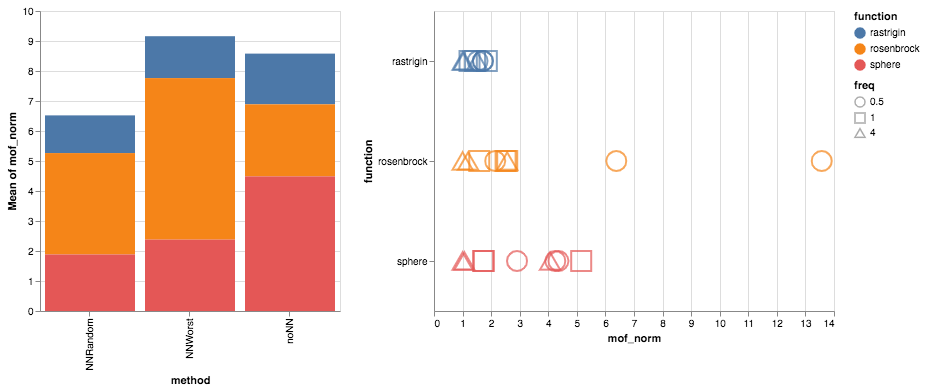

In [189]:
base = alt.Chart(test)
selector1 = alt.selection_single(fields=['method'])

chart1 = base.mark_bar().encode(
    alt.X('method'),
    alt.Y('mean(mof_norm)'),
    alt.Color('function'),
    opacity = alt.condition(selector1, alt.OpacityValue(1.0), alt.OpacityValue(0.1))
).properties(
    width=300
).add_selection(selector1)

chart2 = base.mark_point(size=400).encode(
    alt.X('mof_norm'),
    alt.Y('function'),
    alt.Color('function'),
    alt.Shape('freq:N'),
    alt.Tooltip(['mof_norm','mof','freq','function'])
).transform_filter(
    selector1
).properties(
#     width=200
    height=300
)

chart1|chart2

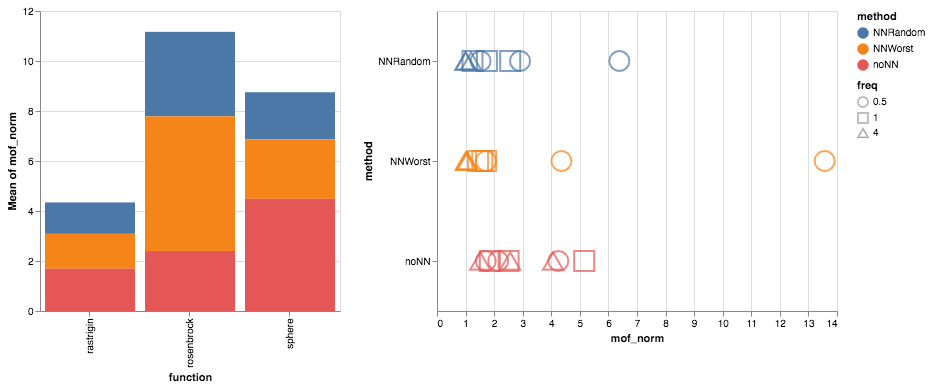

In [190]:
base = alt.Chart(test)
selector1 = alt.selection_single(fields=['function'])

chart1 = base.mark_bar().encode(
    alt.X('function'),
    alt.Y('mean(mof_norm)'),
    alt.Color('method'),
    opacity = alt.condition(selector1, alt.OpacityValue(1.0), alt.OpacityValue(0.1))
).properties(
    width=300
).add_selection(selector1)

chart2 = base.mark_point(size=400).encode(
    alt.X('mof_norm'),
    alt.Y('method'),
    alt.Color('method'),
    alt.Shape('freq:N'),
    alt.Tooltip(['mof_norm','mof','freq','function'])
).transform_filter(
    selector1
).properties(
#     width=200
    height=300
)

chart1|chart2.interactive()

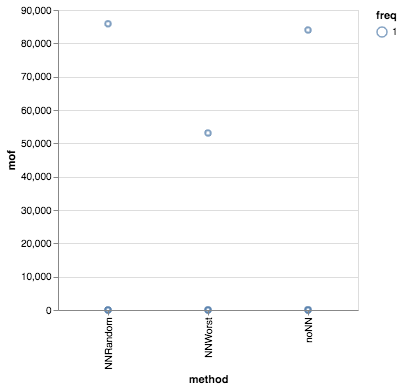

In [187]:
alt.Chart(test).mark_point().encode(
    alt.X('method'),
    alt.Y('mof'),
    alt.Color('freq:N'),
    alt.Tooltip(['method','mof','freq'])
).properties(
    width=300
)

# ----